<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/MLP_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Mounted at /content/drive


In [2]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

## hyperparameter

In [23]:
def hyperParameter(data):
  y = data['telomere length (kb)']
  X = data.drop('telomere length (kb)',1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30), (80,60,40), (60,40,20), (50,30,10)],
    'max_iter': [200, 400, 600, 800, 1000],
    'activation': ['relu','LeakyReLU','identify'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size':[4, 8, 16, 32, 64],
    'random_state':[216]
  }
  model = MLPRegressor()

  gsearch = GridSearchCV(estimator = model,
                           param_grid = param_grid                    
                          )

  gsearch.fit(X_train,y_train)

  return gsearch.best_params_

# data1

In [5]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-5-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


In [6]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [7]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.101103,0.236189,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.107011,0.278374,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.124093,0.217282,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.474317,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.304306,0.348495,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.440437,0.155547
419,1.0,0.194030,0.290503,0.306061,0.372519,0.543024,0.478333,0.343548,0.206655,0.429587,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.489617,0.177269
420,0.0,0.149254,0.450155,0.542424,0.400000,0.497220,0.480741,0.531452,0.381032,0.397039,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.405464,0.182700


In [24]:
hyperParameter(df)

<ipython-input-23-1834599e46ea>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
13500 fits failed out of a total of 20250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-pa

{'activation': 'relu',
 'batch_size': 4,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [25]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)

<ipython-input-25-2081a7e829a9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [27]:
model = MLPRegressor(hidden_layer_sizes=(150, 100, 50),activation = 'relu',solver = 'sgd',
                     learning_rate_init = 0.001, max_iter = 200, batch_size = 4, random_state=216)
model.fit(X_train, y_train)

MLPRegressor(batch_size=4, hidden_layer_sizes=(150, 100, 50), random_state=216,
             solver='sgd')

In [28]:
y_pred = model.predict(X_test)

In [29]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: 0.9217611233792693
MSE Train: 0.0027562583275257627
MAE Train: 0.04019131634610395


In [30]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.18113070571368786


In [31]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9115572914806856
MSE Test: 0.002626478846807712
MAE Test: 0.03976309214167844


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


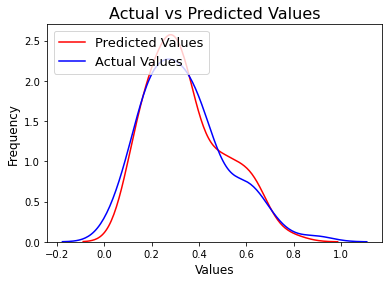

In [32]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data2

In [33]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-33-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop('Unnamed: 0',1,inplace = True)


In [34]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [35]:
df2 = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])
df2

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.099431,0.230680,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.112349,0.300850,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.120961,0.234903,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.461639,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.298434,0.346626,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.445082,0.155547
419,1.0,0.194030,0.498250,0.271818,0.700763,0.569366,0.503148,0.382581,0.237473,0.506432,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.498689,0.177269
420,0.0,0.149254,0.537579,0.565909,0.539695,0.582488,0.546296,0.554355,0.457402,0.309175,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.528689,0.182700


In [36]:
hyperParameter(df2)

<ipython-input-23-1834599e46ea>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
13500 fits failed out of a total of 20250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-pa

{'activation': 'relu',
 'batch_size': 4,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [37]:
y = df2['telomere length (kb)'].values
X = df2.drop('telomere length (kb)',1).values

<ipython-input-37-8bd2b2c93927>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1).values


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [39]:
model = MLPRegressor(hidden_layer_sizes=(150, 100, 50),activation = 'relu',solver = 'sgd',
                     learning_rate_init = 0.001, max_iter = 200, batch_size = 4, random_state=216)
model.fit(X_train, y_train)

MLPRegressor(batch_size=4, hidden_layer_sizes=(150, 100, 50), random_state=216,
             solver='sgd')

In [40]:
y_pred = model.predict(X_test)

In [41]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: 0.9239385077883571
MSE Train: 0.00268994744868291
MAE Train: 0.039937556248450676


In [42]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.17839002045062957


In [43]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9062723051156134
MSE Test: 0.0027923009352130985
MAE Test: 0.040111887486189275


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


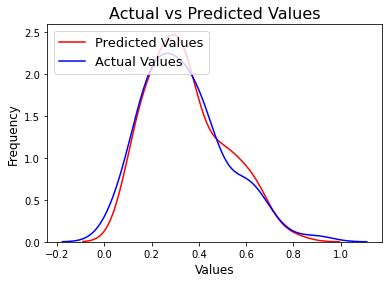

In [44]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data control

In [45]:
data_file_path = os.path.join(path,'df_control.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-45-bf1a70202b09>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [46]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [47]:
df3 = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [48]:
df3

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.6607,0.2759,0.1274,0.1818,0.2845,0.4444,0.6216,0.3103,0.0854,...,0.6,0.5172,0.4091,0.1323,0.7407,0.2909,0.1186,0.0000,0.5823,0.4262
1,1.0,0.0714,0.7202,0.2394,0.2727,0.4052,0.2698,0.4595,0.4655,0.1566,...,0.4,0.5517,0.2803,0.1089,0.3704,0.3273,0.0678,0.0323,0.4304,0.4754
2,1.0,0.7500,0.2507,0.2625,0.4545,0.2672,0.1429,0.6216,0.5517,0.1673,...,0.3,0.3621,0.8182,0.2996,0.5370,0.8091,0.1525,0.4839,0.7595,0.5082
3,1.0,0.2679,0.3912,0.2992,0.3636,0.4138,0.1429,0.1351,0.3621,0.1993,...,0.2,0.5172,0.5758,0.1167,0.6667,0.5273,0.1186,0.1290,0.2405,0.4262
4,0.0,0.4643,0.2971,0.6081,0.5682,0.6983,0.7460,0.6757,0.9655,0.4377,...,0.5,0.8448,0.5455,0.1790,0.5185,0.5455,0.1017,0.0968,0.6709,0.4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.7143,0.2029,0.6023,0.5682,0.6897,0.7143,0.5946,0.3103,0.4840,...,0.5,0.8448,0.4545,0.6304,0.1296,0.4091,0.4576,0.4839,0.7975,0.6557
149,0.0,0.6786,0.1021,0.4093,0.5227,0.4397,0.2698,0.6486,0.3621,0.3879,...,0.6,0.8276,0.5227,0.1751,0.2778,0.6364,0.1186,0.5484,0.3291,0.7049
150,1.0,0.3929,0.6897,0.2838,0.4545,0.3017,0.2540,0.0000,0.4483,0.2135,...,0.4,0.4655,0.6818,0.1984,0.5741,0.6636,0.0339,0.0000,0.2152,0.3770
151,1.0,0.7321,0.2361,0.4054,0.3182,0.6466,0.4921,0.2162,0.3621,0.2313,...,0.4,0.5345,0.8561,0.1907,0.4444,0.9455,0.1017,0.2258,0.3544,0.4754


In [49]:
hyperParameter(df3)

<ipython-input-23-1834599e46ea>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", 

{'activation': 'relu',
 'batch_size': 4,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'random_state': 216,
 'solver': 'sgd'}

In [50]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-50-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [52]:
model = MLPRegressor(hidden_layer_sizes=(150, 100, 50),activation = 'relu',solver = 'sgd',
                     learning_rate_init = 0.001, max_iter = 200, batch_size = 4, random_state=216)
model.fit(X_train, y_train)

MLPRegressor(batch_size=4, hidden_layer_sizes=(150, 100, 50), random_state=216,
             solver='sgd')

In [53]:
y_pred = model.predict(X_test)

In [54]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))

R2 Value Train: 0.743969883827551
MSE Train: 0.008864313677002326
MAE Train: 0.07991909719241036


In [55]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.3446736918770495


In [56]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.6896391761562977
MSE Test: 0.019505660616035946
MAE Test: 0.11608294974685071


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


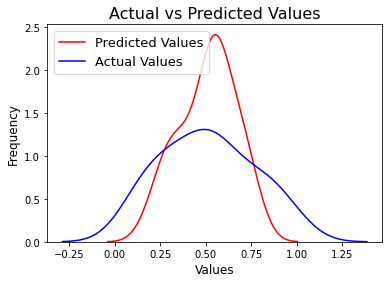

In [57]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)